# Интернет-магазин

## План проекта

### Цели:
1. Приоритизировать гипотезы, которые были подготовлены вместе с отделом маркетинга
2. Запустить A/B-тест и выяснить согласно результатам что может привести к увеличению выручки
### Задачи:
__Приоритизация гипотез:__
* Применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета;
* Применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета;
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить причину;\
__Анализ A/B-теста:__
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения;
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения;
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения;
* Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения;
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения;
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения;
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей;
* Построить точечный график стоимостей заказов. Сделать выводы и предположения;
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов;
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения;
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения;
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения;
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения;
* Принять решение по результатам теста и объясните его.\
\
Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.
### Ход исследования:
Данные я получу из нескольких датасетов (/datasets/hypothesis.csv - для первой части проекта, /datasets/orders.csv и /datasets/visitors.csv - для второй части проекта). О качестве данных ничего не известно, поэтому первым этапом будет необходимо открыть данные, посмотреть на наличие дублей, аномалий и т.п. Затем, на этапе предобработки данных я поищу возиомжность устранения всех ошибок, которые могут повлиять на результат.\
\
Таким образом, моё исследование будет состоять из следующих этапов:
1. Обзор данных
2. Предобработка данных
3. Промежуточный вывод после предобработки
4. Приоритизация гипотез
5. Вывод после проведения приоритизации гипотез
6. Анализ A/B-теста
7. Решение о том, стоит ли продолжать или остановить A/B-тест
8. Написание общего вывода

## Обзор данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:
# прочитаем данные через конструкцию try-except
try:
    hypothesis = pd.read_csv('/Users/bis.partnermail.ru/Desktop/Яндекс Практикум/datasets/hypothesis.csv')
    orders = pd.read_csv('/Users/bis.partnermail.ru/Desktop/Яндекс Практикум/datasets/orders.csv')
    visitors = pd.read_csv('/Users/bis.partnermail.ru/Desktop/Яндекс Практикум/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#выведем первые 5 строк каждого датасета
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Заметим, что в датафрейме hypothesis верхний регистр. Заменим его на нижний.

In [4]:
# посмотрим также размеры датасетов
print(hypothesis.shape)

(9, 5)


С размером первого датасета все понятно. Как и говорилось в описании, в файле содержаться 9 гипотез (9 строк) и 5 столбцов (наименование гипотезы и параметры Reach, Impact, Confidence, Effort). Двигаемся дальше.

In [5]:
print(orders.shape)
print(visitors.shape)

(1197, 5)
(62, 3)


С размерами датасетов тоже все в порядке на первый взгляд. Посмотрим типы данных заранее, особенно заострим внимание на дате в датасетах orders и visitors.

In [6]:
# выведем информацию по датафрейму orders
orders.info()
# выведем информацию по датафрейму visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Как и предполагалось. На этапе предобработке данных заменим тип object в поле date на datetime в датафреймах orders и visitors.

### Промежуточный вывод:
Данные заранее были хорошо подготовлены, спасибо!\
Потребуется заменить регистр в названиях полей датафрейма hypothesis. Также, необходимо заменить тип данных с object на datetime в полях date, чем и займемся на следующем этапе.

## Предобработка данных

1. Заменим тип данных с object на datetime в полях date
2. Заменим названия столбцов датафреймов
3. Приведем название столбцов hypothesis к нижнему регистру
4. Посмотрим данные на дубли и ошибки, и устраним их в случаи возможности

In [7]:
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# заменим тип данных столбца date в датафреймах orders и visitors
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
# проверим тип данных после изменений
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
orders.rename(columns={
    'transactionId':'transaction_id',
    'visitorId':'visitor_id'}, inplace=True)
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# заменим регистр на нижний
hypothesis.columns = hypothesis.columns.str.lower()

In [12]:
# проверим названия столбцов
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


In [13]:
# посмотрим данные на наличие дублей
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [14]:
# выполним проверку на наличие дублей по id в обеих группах в таблице orders
# посчитаем сколько уникальных значений по группам
count = orders.groupby('visitor_id')['group'].nunique()
# посмотрим сколько выходит повторений id в группах
countGroups = pd.DataFrame(count)
countGroups.head()
countGroups.value_counts()

group
1        973
2         58
dtype: int64

Заметим, что в датафрейме orders присутсвуют пользователи, которые находятся в обеих группах. Доля этих пользователей от уникальных пользователей составляет 6%. Так как дубли занимают небольшую долю, оставим их, чтобы не испортить данные.

Можем переходить к приоритизации гипотез.

### Вывод
* По результатам предобраотки данных удалось выявить дубликаты и другие ошибки в данных. Пользователи, которые попали в обе выборке составляют 6% от общего числа пользователей, поэтому было принято решение оставить данные, так как удаление данных может повлиять на конечные выводы.
* Изменили наименование столбцов датафрейма orders для упрощения работы, также изменен тип данных столбца date в датафреймах orders и visitors.

## Приоритизация гипотез

In [15]:
# выведем датафрейм с гипотезами
pd.options.display.max_colwidth = 120
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем гипотезы по убыванию приоритета.

In [16]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По фреймворку ICE в приоритете оказались гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Применим фреймворк RICE для приоритизации гипотез и отсортируем гипотезы по убыванию приоритета.

In [17]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По фреймворку RICE в приоритете оказались гипотезы:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Вывод
Приоритизация во фреймворках ICE и RICE отличается. Первые две гипотезы во фреймворке RICE оказались в топе благодаря высокому показателю Reach.\
С математической точки зрения чем больше числитель и меньше знаминатель, тем выше и будет конечное число. Соответственно, из-за введения новой переменной (охвата), приоритизация поменялась.

In [18]:
display(hypothesis[['hypothesis','ICE','RICE']])

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2


## Анализ A/B-теста

Данные мы посмотрели и подкорректировали, что смогли, поэтому перейдем к разбивки данных по признакам и к построению графиков.

In [19]:
display(orders.head())
display(visitors.head())

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### График кумулятивной выручки по группам

Чтобы исключить проблему подсматривания, изучим графики кумулятивных метрик.

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg(
                                         {
                                             'date' : 'max',
                                             'group' : 'max',
                                             'transaction_id' : 'nunique',
                                             'visitor_id' : 'nunique',
                                             'revenue' : 'sum'
                                         }
                                     ),
                                     axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg(
        {
            'date' : 'max',
            'group' : 'max',
            'visitors' : 'sum'
        }
    ), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим график кумулятивной выручки по дням и группам A/B-тестирования:

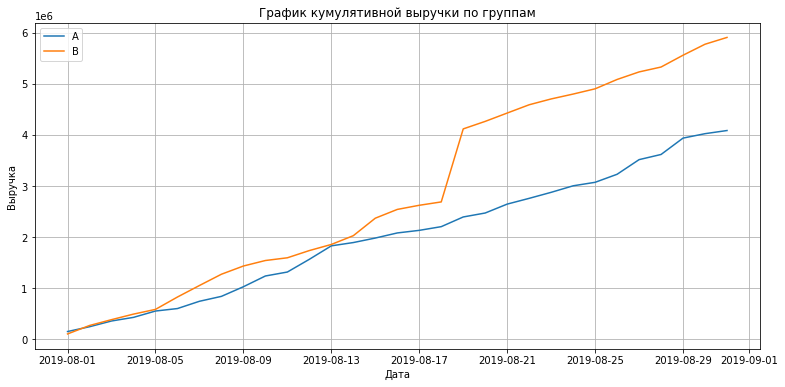

In [21]:
# зададим размер графика
plt.figure(figsize=(13,6))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend();

На графике видно, что выручка с 1 по 17 августа равномерно увеличивалась, но в 18 августа произошел данных всплеск в группе В. Причина этому может быть резкое повышение числа заказов или появлении очень дорогих покупок в выборке.\
\
Позже проанализируем выбросы, а пока перейдём к следующему графику.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

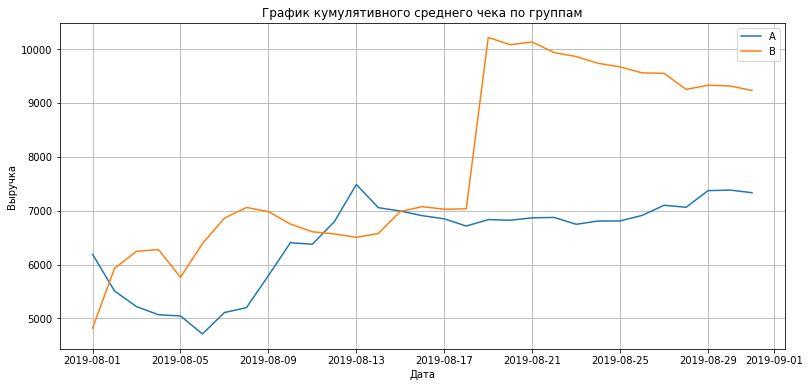

In [22]:
plt.figure(figsize=(13,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend();

На графике кумулятивных средних чеков видно, что произошел всплеск 18-19 августа, поэтому можно сказать, что в этот период были совершены крупные покупки.\
Группа В показывает более динамичный рост на графике, чем группа А. Можно заметить, что случилась просадка в начале группы А и достижение дна 6 августа, но далее значения достигли пика на отметке 8.500 руб. 17 августа. Средний чек для группы становится равномерным ближе к концу теста.\
В целом, группа А имеет более равномерную тенденцию по сравнению с группой В.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

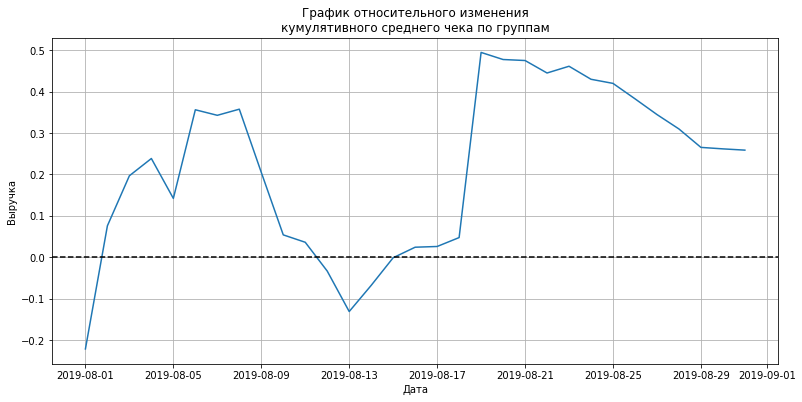

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)
plt.figure(figsize=(13,6))
# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения\nкумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Отчётливо видно, что в данных присутсвуют большие заказы и выбросы. Как и предполагалось.

### График кумулятивного среднего количества заказов на посетителя по группам

Проанализируем график кумулятивного среднего количества заказов на посетителя по группам. Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-09-01', 0, 0.015].

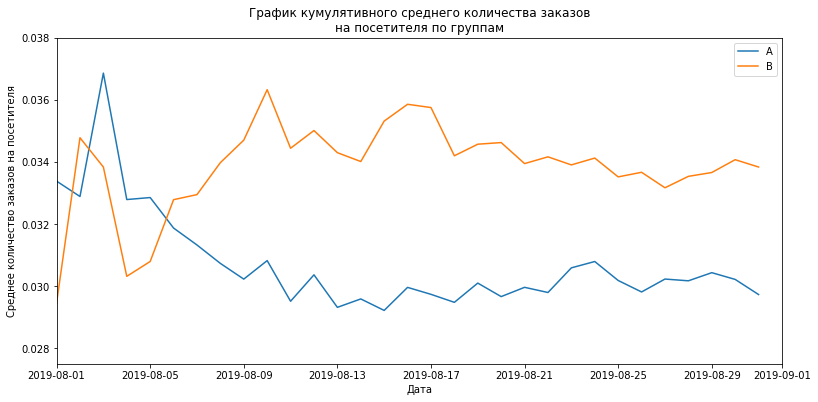

In [24]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(13,6))
plt.title('График кумулятивного среднего количества заказов\nна посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Cреднее количество заказов на посетителя')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.0275, 0.038]);

В начале теста конверсия группы А была была выше, однако после конверсия группы B показала рост, в то время как группа А снижалась.\
На графике заметно пересечение графиков 6 августа, после чего произошло закрепление значений - группа В выравалась вперед и зафиксировалось, а группа А снизилась и зафиксировалась.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

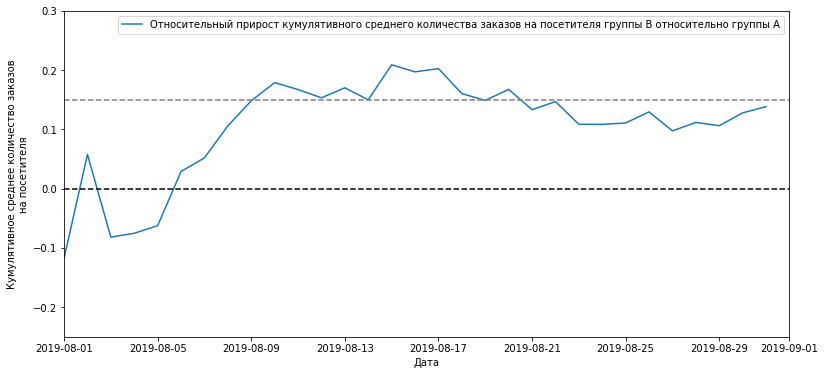

In [25]:
mergedCumulativeConversions = cumulativeDataA[[
    'date',
    'conversion'
]].merge(cumulativeDataB[[
    'date',
    'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13,6))
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
    label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов\nна посетителя')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.25, 0.3]);

Нельзя сказать, что группа А была лидером по куммулятивному среднему количества заказов. Группа В с самого начала графика показала активный рост и закрепилась выше группы А. Ближе к концу графика произошла коррекция, но нельзя сказать, что отношение среднего количества заказов на посетителя установилось. Поэтому рано делать какие-либо выводы по тесту, сначала проведем анализ аномалий.

### Точечный график количества заказов по пользователям

Изучим данные на наличие погрешностей. Для этого построим точечный график заказов по пользователям.

In [26]:
# агрегируем кол-во заказов на пользователя
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
# переименовываем столбцы
ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


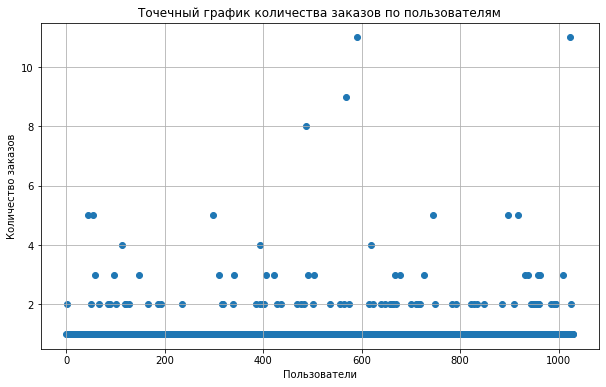

In [27]:
# возьмем значения кол-ва заказов для оси ординат
# по оси абсцисс отложим выручку
plt.figure(figsize=(10,6))
plt.scatter(range(0,len(ordersByUsers['user_id'])), ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid()

Количество пользователей с более 2 заказми и более имеют свою долю в данных, но небольшую. Посчитаем выборочные перцентили количества заказов на одного пользователя, чтобы сделать более точный вывод, считать ли аномалиями 2 заказа на пользователя.а

### 95-й и 99-й перцентили количества заказов на пользователя

In [28]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше, чем 2 заказа. И 1% пользователей заказывали более 4 раза.\
Границей выбросов будем считать 95%.

### Точечный график стоимостей заказов

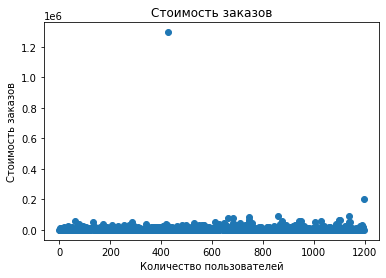

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов');

На графики наблюдаются выбросы в стоимости заказов около 20 тыс. и более 120 тыс. руб. В остальных случаях прослеживается накопление данных в одной области. Посмотрим 95-й и 99-й перцентили для более точных выводов.

### 95-й и 99-й перцентили стоимости заказов

In [30]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 тыс. рублей и не более 1% дороже 58,2 тыс. рублей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Возьмем aplpa = 0.05 и будем использовать тест Манна-Уитни. Так как данные содержат выбросы, будем использовать **непараметрический тест**. \
\
Сформируем гипотезы:\
*H0*: статистически значимые различия в среднем количестве заказов между группами нет.\
*H1*: статистически значимые различия в среднем между группами есть.

In [31]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [32]:
# создадим переменную количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# создадим переменную количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# создадим переменную количество пользователей в выбранную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# создадим переменную количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# создадим переменную количество заказов в выбранную дату в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# суммарное число заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# создадим переменную количество заказов в выбранную дату в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# суммарное число заказов до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим данные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['user_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
# тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


**Вывод:** p-значение оказалось меньше 0.05, что говорит о различии в среднем между группами. Соответственно, нулевая гипотеза (Н0) отвергается. Относительный прирост группы B к группе А равен 13.8% — второе число в выводе.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между сегментами.\
*Н0*: различий в среднем чеке между группами нет;\
*Н1*: различия в среднем чеке между группами есть.\
\
Найдём относительные различия в среднем чеке между группами.

In [34]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.\
Относительное различие среднего чека между сегментами около 26%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Теперь рассмотрим "очищенные данные" и сделаем вывод на их основе.\
\
Напомним, что 95-й и 99-й перцентили средних чеков равны  28 тыс. руб. и 58,2 тыс. руб., соответсвенно. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.\
\
Примем за аномальных пользователей тех, кто совершил от 2-х заказов или заказ дороже 28 тыс. рублей.

In [35]:
# создадим переменные перцентилей для фильрации
percent_orders = int(np.percentile(ordersByUsers['orders'], [95]))
percent_revenue = int(np.percentile(orders['revenue'], [95]))

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percent_orders]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > percent_orders]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percent_revenue]['transaction_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:',abnormalUsers.shape[0]);

858     192721366
18      199603092
23      237748145
37      249864742
1099    316924019
dtype: int64
Количество аномальных пользователей: 80


Всего аномальных пользователей - **80**. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным и посмотрим как аномальные пользователи повлияли на результат теста.

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам. Возьмём за alpha = 0.05\
Сформируем гипотезы:\
*H0*: статистически значимые различия в среднем количестве заказов между группами нет.\
*H1*: статистически значимые различия в среднем между группами есть.

In [37]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.012
Относительные различия: 0.170


P-значение оказалось меньше 0.05, что говорит о различии в среднем между группами. Соответственно, нулевая гипотеза (Н0) отвергается.\
Относительный различия в среднем количестве заказов на посетителя между группами составляет 17%.

Результаты по среднему количеству заказов практически не изменились, отклонения несущественны.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Применим статистический критерий Манна-Уитни к полученным выборкам. Возьмём за alpha = 0.05\
Сформируем гипотезы:\
H0: статистически значимые различия в среднем чеке заказа между группами нет;\
H1: статистически значимые различия в среднем чеке заказа между группами есть.

In [38]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.661
Относительные различия: 0.234


P-value увеличился с 0.729 до 0.993, а разница между сегментами сократилась осталась неизменной.\
Следовательно, можем сделать вывод, что разница оказалась несущественной и нулевую гипотезу не можем отвергнуть.

## Общий вывод

- Отсутствует статистически значимое различие по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Есть статистически значимое различия по среднему чеку между группами по «сырым» и по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A на 15% и присутствует дальнейший потенциал к росту;
- График различия среднего чека говорит о том, что результаты группы B также лучше группы А на 20%.\
На основании вышеизложенных фактов можно сделать вывод, что **тест можно остановить**, так как группа B превосходит группу А и дальнейшее тестирование будет бессмысленно.

### Задачи:
__Приоритизация гипотез:__
- [x] Применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета;
- [x] Применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета;
- [x] Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить причину;\
__Анализ A/B-теста:__
- [x] Построить график кумулятивной выручки по группам. Сделать выводы и предположения;
- [x] Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения;
- [x] Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения;
- [x] Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения;
- [x] Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения;
- [x] Построить точечный график количества заказов по пользователям. Сделать выводы и предположения;
- [x] Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей;
- [x] Построить точечный график стоимостей заказов. Сделать выводы и предположения;
- [x] Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов;
- [x] Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения;
- [x] Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения;
- [x] Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения;
- [x] Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения;
- [x] Принять решение по результатам теста и объясните его.\
\
Все поставленные задачи были выполнены и цели достигнуты.